# Lasso in Concrete-ML

this tutorial is going to show you how to use ridge penalizing linear regression algorithm in Concrete-ml plus Ridge and 
Elastic-net 

**Concrete-ML** is an open-source, privacy-preserving, machine learning inference framework based on fully homomorphic encryption (FHE). It enables data scientists without any prior knowledge of cryptography to automatically turn machine learning models into their FHE equivalent, using familiar APIs from Scikit-learn and PyTorch. 
[documentation website](https://docs.zama.ai/concrete-ml)

![Alt text](https://801304998-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F75MldzZY6YYabEQfXDIR%2Fuploads%2Fgit-blob-bd13f146460dd3096ed0021391be3e4790c18bef%2F3.png?alt=media)

### what is difference between scikit-learn and concrete-ml for creating a ML model?
| Scikit-learn     | Concrete-ML   |
|----------------- |---------------|
| doesn't work on encrypted data             | works on encrypted data         |
 

### How can I apply the same model in sklearn in concrete-ml?
1. preparing dataset 
2. fitting in to the model
3. compiling the model on training set 
4. predict the encrypted data 

let's apply it on ridge - linear regression penalizing model

### Prerequisites 
1. installing *concrete-ml* library by `pip install concrete-ml` or using docker container

The code imports several libraries for machine learning and data visualization, including time, numpy, pandas, and scikit-learn. It also defines an alias for the mean_squared_error function from scikit-learn as mse. Additionally, the code imports FHE equiavalent of the Lasso regression algorithm (ConcreteLasso) from the concrete package. Finally, %matplotlib inline is used to display Matplotlib plots in the Jupyter notebook.

In [1]:
# importing the libraries
import time
from sklearn.datasets import make_regression # to create a regression dataset randomly
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Lasso
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from concrete.ml.sklearn import Lasso as ConcreteLasso
import pandas as pd 

importing and reading the first 5 rows of dataset

In [2]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Heatmap Analysis:

After exploring the relationships between the predictor variables and the target variable using a heatmap, it was observed that the "TV" feature has a stronger linear relationship with the target variable "Sales" compared to the other features. The heatmap indicates that the correlation coefficient between "TV" and "Sales" is higher than the correlation coefficients of the other features with "Sales". Therefore, we can conclude that "TV" is a more influential feature for predicting "Sales" and should be used as the predictor variable in our model.

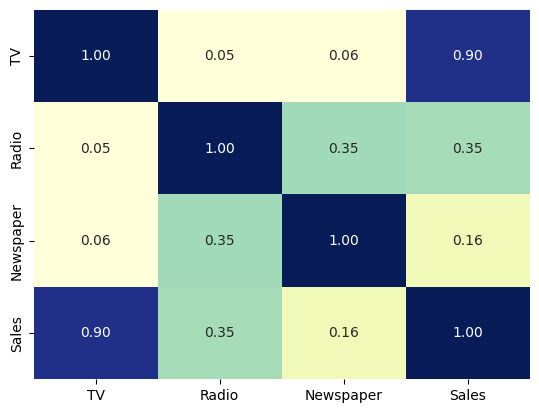

In [3]:
correlations = df.corr()
sns.heatmap(correlations, cmap="YlGnBu", annot=True, fmt=".2f", cbar=False)
plt.show()


The code snippet below extracts the "TV" feature as the predictor variable and "Sales" as the target variable from the dataframe. It then splits the dataset into training and testing sets with a 60-40 ratio for testing and training respectively.

In [4]:
X = df['TV'].values.reshape(-1, 1)
y = df['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#### Description of Functions for Training and Evaluating a Machine Learning Model for Predicting Sales Based on "TV" Feature.

The code provided above consists of four functions, namely `fhe_model_trainer()`, `skl_model_trainer()`, `create_y_space()`, `plot_dataset()`, `plot_fhe()`, and `plot_skl()`. The purpose of these functions is to train and evaluate a machine learning model for predicting sales based on the "TV" feature in the input data. 

`fhe_model_trainer()` and `skl_model_trainer()` functions both take a machine learning model as an input and use the `fit()` method to train it on the training data. For the FHE model, an FHE circuit is compiled using the `compile()` method and the client's key is generated using the `keygen()` method. Finally, the trained model is returned from the function.

The `create_y_space()` function takes the testing input data and the trained FHE model as inputs, and creates a new input space that ranges from the minimum to the maximum value of the testing input data. This new input space is used to predict the output values using the FHE model, and the predicted output values are returned along with the new input space.

The `plot_dataset()` function takes the training and testing input data, and plots them as two separate scatter plots. The training data is plotted using a red circle marker, while the testing data is plotted using a black "x" marker. 

The `plot_fhe()` function takes the testing input data and the trained FHE model as inputs, and plots the predicted output values as a continuous curve. The input space and the predicted output values are created using the `create_y_space()` function, and the `plot()` method is used to draw the curve on the provided axis.

The `plot_skl()` function takes the testing input data and the trained scikit-learn model as inputs, and plots the predicted output values as a continuous curve. The `predict()` method is used to generate the predicted output values, and the `plot()` method is used to draw the curve on the provided axis.

In [5]:
def fhe_model_trainer(model):
    model.fit(X_train, y_train)
    fhe_circuit = model.compile(X_train)
    fhe_circuit.client.keygen(force=False)
    return model

def skl_model_trainer(model):
    model.fit(X_train, y_train)
    return model

def create_y_space(X_test, fhe_model):
    x_space = np.linspace(X_test.min(), X_test.max(), num=300)[:, np.newaxis]
    y_pred = fhe_model.predict(x_space)
    return [x_space, y_pred]

def plot_dataset(ax,X_train, y_train, X_test, y_test):
#     fig = plt.figure(figsize=(10, 5))
    ax.scatter(X_train, y_train, marker='o', c='r', label='Train')
    ax.scatter(X_test, y_test, marker='x', c='black', label='test')
    ax.legend()

def plot_fhe(ax, X_test, fhe_model, **kwargs):
    space = create_y_space(X_test, fhe_model)
    ax.plot(space[0], space[1], **kwargs)

def plot_skl(ax, X_test, skl_model, **kwargs):
    y_pred = skl_model.predict(X_test)
    ax.plot(X_test, y_pred, **kwargs)

    

### Training the model

The below code is used to train and evaluate different Lasso regression models using both Sklearn and FHE libraries for predicting Sales based on the "TV" feature. 

The first three lines define three different Lasso models with different bit-lengths for FHE encryption. The next line defines a Sklearn Lasso model. 

The code then creates a plot with three subplots arranged vertically using `subplots()` function. The first three subplots each show the training and testing data as scatter points, and the predicted output of each FHE Lasso model as a continuous curve. The fourth subplot shows only the training and testing data, and the predicted output of the Sklearn Lasso model as a series of discrete points. 

The `plot_dataset()` function is used to plot the training and testing data as scatter points. The `plot_fhe()` function is used to plot the predicted output of the FHE Lasso models as continuous curves. The `plot_skl()` function is used to plot the predicted output of the Sklearn Lasso model as a series of discrete points.

The `ax.legend()` function is used to add a legend to each subplot. The `plt.xlabel()` function is used to add a label to the x-axis of the plot. Finally, the `plt.show()` function is used to display the plot. 

The purpose of this code is to compare the performance of the different Lasso models, both in terms of accuracy and efficiency, and to evaluate the suitability of using FHE to perform encrypted machine learning on sensitive data.

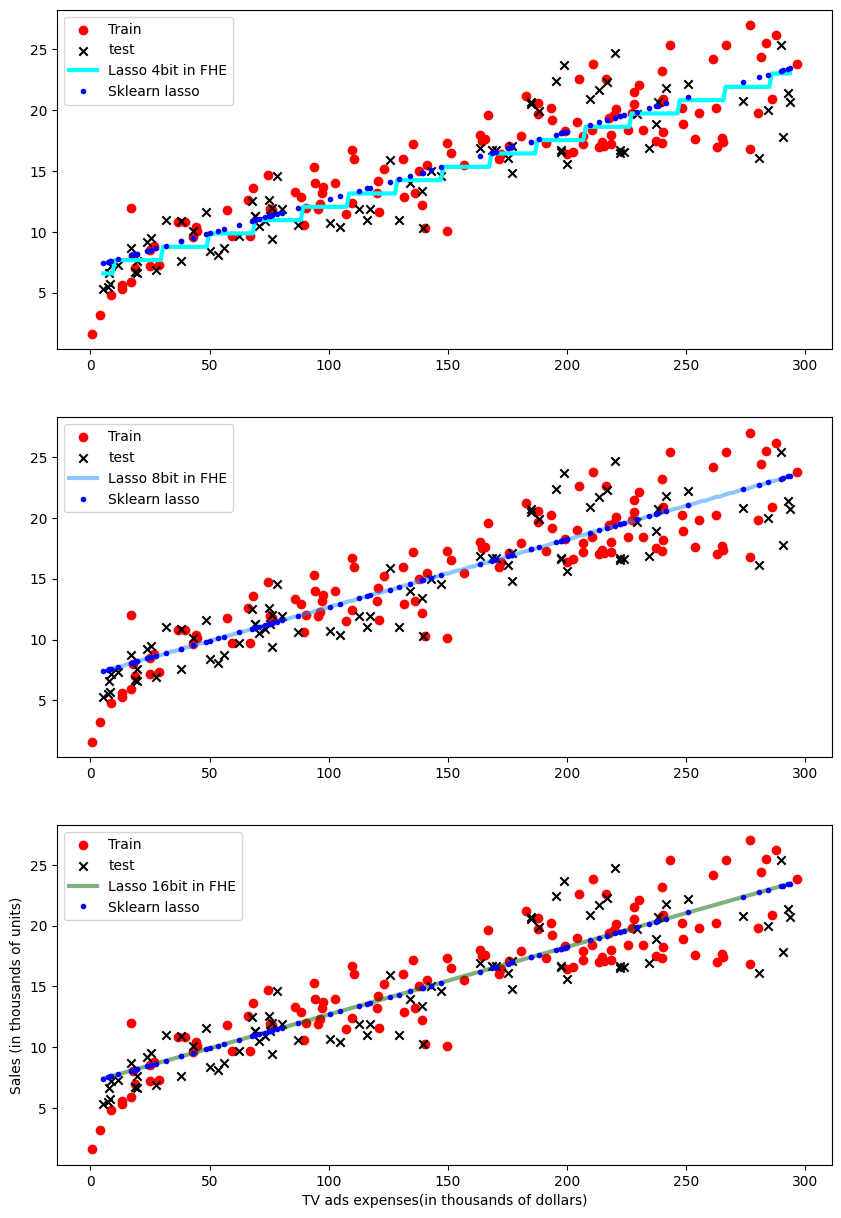

In [23]:
fhe_lasso_4bit = fhe_model_trainer(ConcreteLasso(n_bits=4, alpha=1))
fhe_lasso_8bit = fhe_model_trainer(ConcreteLasso(n_bits=8, alpha=1))
fhe_lasso_16bit = fhe_model_trainer(ConcreteLasso(n_bits=16, alpha=1))
skl_lasso = skl_model_trainer(Lasso(alpha=1))

fig, ax = plt.subplots(3, 1)
fig.set_size_inches(10,15)

plot_dataset(ax[0],X_train, y_train, X_test, y_test)
plot_fhe(ax[0],X_test, fhe_lasso_4bit, c="aqua", label="Lasso 4bit in FHE", linewidth=3)
ax[0].legend()

plot_dataset(ax[1],X_train, y_train, X_test, y_test)
plot_fhe(ax[1], X_test, fhe_lasso_8bit, c="dodgerblue", label="Lasso 8bit in FHE", linewidth=3, alpha=0.5)
ax[1].legend()

plot_dataset(ax[2],X_train, y_train, X_test, y_test)

plot_fhe(ax[2] ,X_test, fhe_lasso_16bit, c="darkgreen", label="Lasso 16bit in FHE", linewidth=3, alpha=0.5)
ax[2].legend()

for i in range(3):
    plot_skl(ax[i], X_test, skl_lasso, label="Sklearn lasso",c='blue', marker='o', markersize=3, linestyle="None", linewidth=0.7)
    ax[i].legend()

plt.xlabel("TV ads expenses(in thousands of dollars)")
plt.ylabel("Sales (in thousands of units)")
plt.show()

 The phenomenon of the step-like discontinuity observed in the 4-bit Lasso plot can be attributed to the process of quantization in Fully Homomorphic Encryption (FHE). In FHE, quantization is used to reduce the precision of encrypted data before performing computations on it. The quantization process can cause the resulting curve to appear step-like or discontinuous due to the limited number of values that can be represented by a quantized signal. This results in an approximation of the original FHE-encrypted signal. The higher the number of bits used for quantization, the smoother and more continuous the resulting curve becomes.

 it is also in 8-bit and 16-bit versions but with less impact, and as you can see they cover the sklearn predictions.

 for more you can check the [documentation](https://docs.zama.ai/concrete-ml/getting-started/concepts)






### Evaluation of FHE Lasso models and Sklearn Lasso using Mean Squared Root metric.
The code defines three FHE Lasso models with different bit sizes (4-bit, 8-bit, and 16-bit) and a Sklearn Lasso model. It then creates an empty dictionary `results` to store the root mean squared error (RMSE) of each FHE model and calculates the RMSE for each FHE Lasso model and the Sklearn Lasso model. Finally, it prints the RMSE for each model.

The `mse()` function is used to calculate the RMSE between the actual values `y_test` and the predicted values `y_pred`. The `results` dictionary is updated with the RMSE of each FHE Lasso model, using their respective names as keys. The RMSE for the Sklearn Lasso model is also calculated and stored in the variable `skl_lasso_mse`.

The last part of the code prints the RMSE for each model, starting with the header "Mean Squared Root metric for Lasso models". A loop is used to iterate over the `results` dictionary and print the RMSE for each FHE Lasso model. The Sklearn Lasso model RMSE is printed last.

Overall, this code is used to compare the performance of FHE Lasso models with different bit sizes to the Sklearn Lasso model, using the RMSE metric.

In [7]:
fhe_lasso_models = [fhe_lasso_4bit, fhe_lasso_8bit, fhe_lasso_16bit]
names = ['FHE Lasso 4-bit', 'FHE Lasso 8-bit', 'FHE Lasso 16-bit']
results = dict()
# comparing the fhe model 
for i in range(3):
    y_pred = fhe_lasso_models[i].predict(X_test)
    results[names[i]] = mse(y_test, y_pred, squared=False)

# calculating mse for sklearn lasso
y_pred = skl_lasso.predict(X_test)
skl_lasso_mse = mse(y_test, y_pred, squared=False)

print("Mean Squared Root metric for Lasso models")
for key, value in results.items():
    print(10*'-')
    print(key , ': ' , value)

print(10*'-')
print("Sklearn Lasso: ", skl_lasso_mse)


Mean Squared Root metric for Lasso models
----------
FHE Lasso 4-bit :  2.2415551096679733
----------
FHE Lasso 8-bit :  2.2682145593789302
----------
FHE Lasso 16-bit :  2.272746726858861
----------
Sklearn Lasso:  2.272748822112653


The code defines a function `timer` that measures the time it takes to train a machine learning model using a given model trainer function. It then initializes a list of models using `fhe_model_trainer` with varying numbers of bits and a `skl_model_trainer` with the `Lasso` model from scikit-learn. It then creates a dictionary `timings` that maps the name of each model to the time it takes to train it using the `timer` function. Finally, it prints out the timings for each model in the `timings` dictionary.

In [29]:
# timing 
import time

def timer(n_bits):
    start = time.time()
    fhe_model_trainer(ConcreteLasso(n_bits=n_bits, alpha=1))
    end = time.time()
    return (end - start)

bits = [4, 8, 16]
names = ['FHE Lasso 4-bit', 'FHE Lasso 8-bit', 'FHE Lasso 16-bit']

timings = {}
for i in range(3):
    timings[names[i]] = timer(bits[i])


print("Timings for each model:")
for model, time in timings.items():
    print(f"{model}: {time} seconds")


Timings for each model:
FHE Lasso 4-bit: 0.18800020217895508 seconds
FHE Lasso 8-bit: 0.1497189998626709 seconds
FHE Lasso 16-bit: 0.13366985321044922 seconds


### Ridge

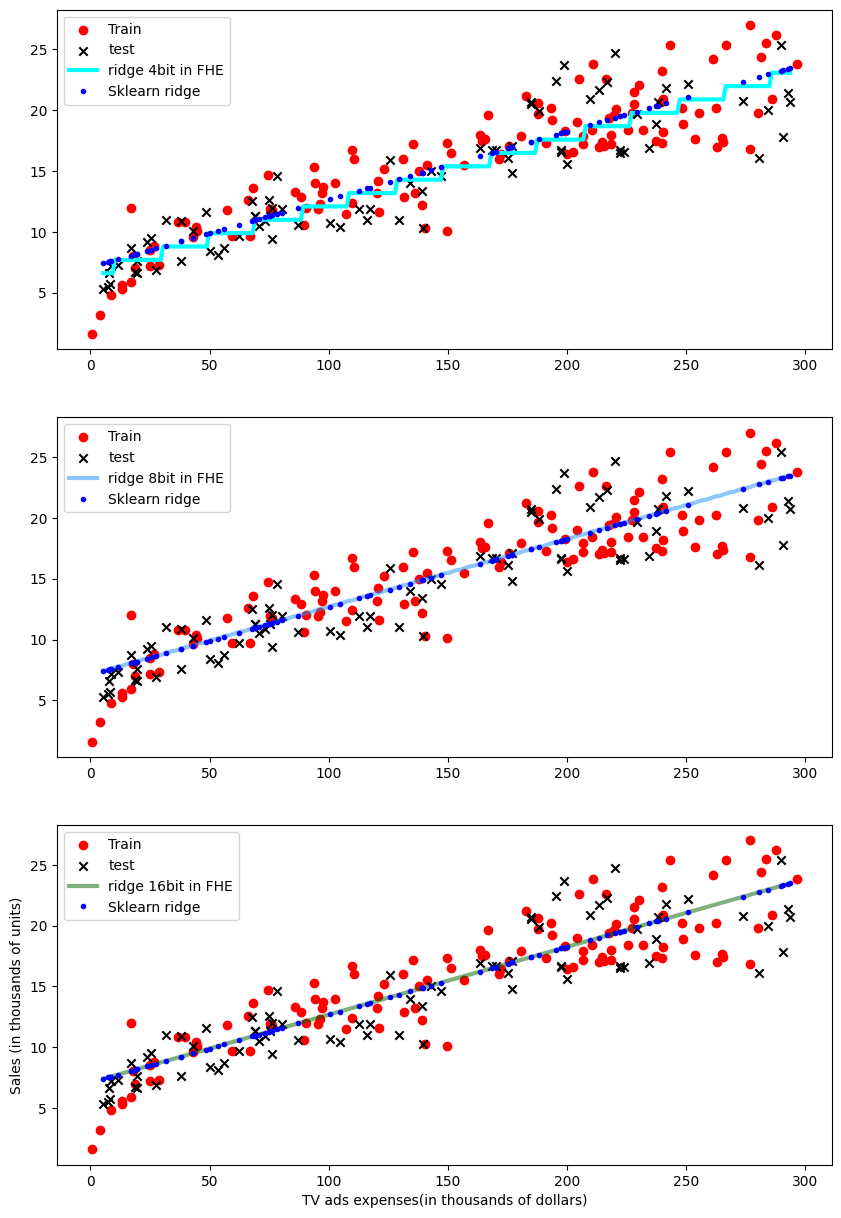

In [9]:
from concrete.ml.sklearn import Ridge as ConcreteRidge
from sklearn.linear_model import Ridge


fhe_ridge_4bit = fhe_model_trainer(ConcreteRidge(n_bits=4, alpha=1))
fhe_ridge_8bit = fhe_model_trainer(ConcreteRidge(n_bits=8, alpha=1))
fhe_ridge_16bit = fhe_model_trainer(ConcreteRidge(n_bits=16, alpha=1))
skl_ridge = skl_model_trainer(Ridge(alpha=1))

fig, ax = plt.subplots(3, 1)
fig.set_size_inches(10,15)

plot_dataset(ax[0],X_train, y_train, X_test, y_test)
plot_fhe(ax[0],X_test, fhe_ridge_4bit, c="aqua", label="ridge 4bit in FHE", linewidth=3)
ax[0].legend()

plot_dataset(ax[1],X_train, y_train, X_test, y_test)
plot_fhe(ax[1], X_test, fhe_ridge_8bit, c="dodgerblue", label="ridge 8bit in FHE", linewidth=3, alpha=0.5)
ax[1].legend()

plot_dataset(ax[2],X_train, y_train, X_test, y_test)

plot_fhe(ax[2] ,X_test, fhe_ridge_16bit, c="darkgreen", label="ridge 16bit in FHE", linewidth=3, alpha=0.5)
ax[2].legend()

for i in range(3):
    plot_skl(ax[i], X_test, skl_ridge, label="Sklearn ridge",c='blue', marker='o', markersize=3, linestyle="None", linewidth=0.7)
    ax[i].legend()

plt.xlabel("TV ads expenses(in thousands of dollars)")
plt.ylabel("Sales (in thousands of units)")
plt.show()

### comparing RMSE

In [10]:
fhe_ridge_models = [fhe_ridge_4bit, fhe_ridge_8bit, fhe_ridge_16bit]
names = ['FHE ridge 4-bit', 'FHE ridge 8-bit', 'FHE ridge 16-bit']
results = dict()
# comparing the fhe model 
for i in range(3):
    y_pred = fhe_ridge_models[i].predict(X_test)
    results[names[i]] = mse(y_test, y_pred, squared=False)

# calculating mse for sklearn ridge
y_pred = skl_ridge.predict(X_test)
skl_ridge_mse = mse(y_test, y_pred, squared=False)

print("Mean Squared Root metric for ridge models")
for key, value in results.items():
    print(10*'-')
    print(key , ': ' , value)

print(10*'-')
print("Sklearn ridge: ", skl_ridge_mse)


Mean Squared Root metric for ridge models
----------
FHE ridge 4-bit :  2.2407147419539366
----------
FHE ridge 8-bit :  2.275846792112995
----------
FHE ridge 16-bit :  2.2728025057171157
----------
Sklearn ridge:  2.2728005476679183


In [30]:
# timing 
import time

def timer(n_bits):
    start = time.time()
    fhe_model_trainer(ConcreteRidge(n_bits=n_bits, alpha=1))
    end = time.time()
    return (end - start)

bits = [4, 8, 16]
names = ['FHE Ridge 4-bit', 'FHE Ridge 8-bit', 'FHE Ridge 16-bit']

timings = {}
for i in range(3):
    timings[names[i]] = timer(bits[i])


print("Timings for each model:")
for model, time in timings.items():
    print(f"{model}: {time} seconds")


Timings for each model:
FHE Ridge 4-bit: 0.1607649326324463 seconds
FHE Ridge 8-bit: 0.16138386726379395 seconds
FHE Ridge 16-bit: 0.14668798446655273 seconds


## ElasticNet

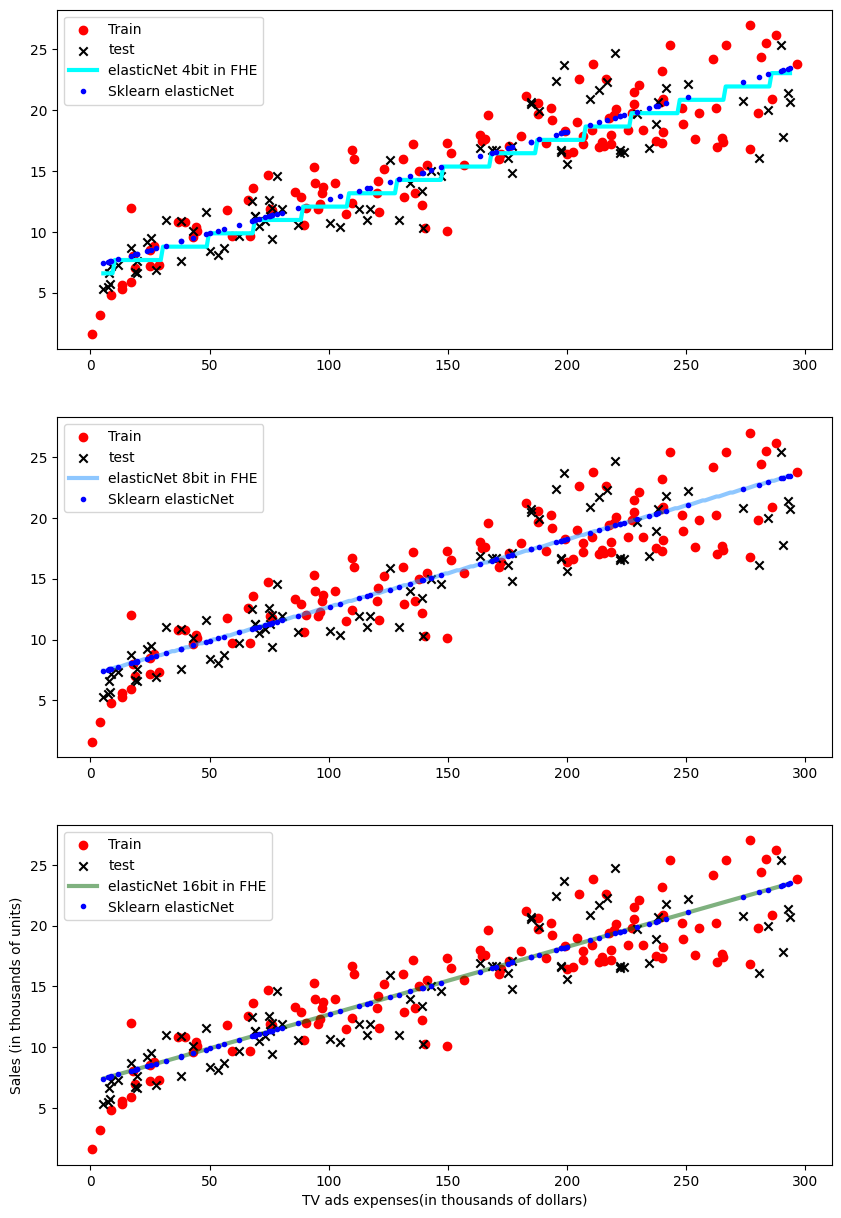

In [12]:
from concrete.ml.sklearn import ElasticNet as ConcreteElasticNet
from sklearn.linear_model import ElasticNet


fhe_elasticNet_4bit = fhe_model_trainer(ConcreteElasticNet(n_bits=4, alpha=1))
fhe_elasticNet_8bit = fhe_model_trainer(ConcreteElasticNet(n_bits=8, alpha=1))
fhe_elasticNet_16bit = fhe_model_trainer(ConcreteElasticNet(n_bits=16, alpha=1))
skl_elasticNet = skl_model_trainer(ElasticNet(alpha=1))

fig, ax = plt.subplots(3, 1)
fig.set_size_inches(10,15)

plot_dataset(ax[0],X_train, y_train, X_test, y_test)
plot_fhe(ax[0],X_test, fhe_elasticNet_4bit, c="aqua", label="elasticNet 4bit in FHE", linewidth=3)
ax[0].legend()

plot_dataset(ax[1],X_train, y_train, X_test, y_test)
plot_fhe(ax[1], X_test, fhe_elasticNet_8bit, c="dodgerblue", label="elasticNet 8bit in FHE", linewidth=3, alpha=0.5)
ax[1].legend()

plot_dataset(ax[2],X_train, y_train, X_test, y_test)

plot_fhe(ax[2] ,X_test, fhe_elasticNet_16bit, c="darkgreen", label="elasticNet 16bit in FHE", linewidth=3, alpha=0.5)
ax[2].legend()

for i in range(3):
    plot_skl(ax[i], X_test, skl_elasticNet, label="Sklearn elasticNet",c='blue', marker='o', markersize=3, linestyle="None", linewidth=0.7)
    ax[i].legend()

plt.xlabel("TV ads expenses(in thousands of dollars)")
plt.ylabel("Sales (in thousands of units)")
plt.show()

### Comparing results

In [13]:
fhe_elasticNet_models = [fhe_elasticNet_4bit, fhe_elasticNet_8bit, fhe_elasticNet_16bit]
names = ['FHE elasticNet 4-bit', 'FHE elasticNet 8-bit', 'FHE elasticNet 16-bit']
results = dict()
# comparing the fhe model 
for i in range(3):
    y_pred = fhe_elasticNet_models[i].predict(X_test)
    results[names[i]] = mse(y_test, y_pred, squared=True)

# calculating mse for sklearn elasticNet
y_pred = skl_elasticNet.predict(X_test)
skl_elasticNet_mse = mse(y_test, y_pred, squared=True)

print("Mean Squared Root metric for elasticNet models")
for key, value in results.items():
    print(10*'-')
    print(key , ': ' , value)

print(10*'-')
print("Sklearn elasticNet: ", skl_elasticNet_mse)


Mean Squared Root metric for elasticNet models
----------
FHE elasticNet 4-bit :  5.02241681631577
----------
FHE elasticNet 8-bit :  5.160781833374436
----------
FHE elasticNet 16-bit :  5.165463988632444
----------
Sklearn elasticNet:  5.165454336195514


In [32]:
# timing 
import time

def timer(n_bits):
    start = time.time()
    fhe_model_trainer(ConcreteElasticNet(n_bits=n_bits, alpha=1))
    end = time.time()
    return (end - start)

bits = [4, 8, 16]
names = ['FHE ElasticNet 4-bit', 'FHE ElasticNet 8-bit', 'FHE ElasticNet 16-bit']

timings = {}
for i in range(3):
    timings[names[i]] = timer(bits[i])


print("Timings for each model:")
for model, time in timings.items():
    print(f"{model}: {time} seconds")


Timings for each model:
FHE ElasticNet 4-bit: 0.1673116683959961 seconds
FHE ElasticNet 8-bit: 0.17817473411560059 seconds
FHE ElasticNet 16-bit: 0.14162349700927734 seconds


In conclusion, this tutorial has covered the process of training a server-side model using Fully Homomorphic Encryption (FHE) and preparing it to predict encrypted data from client data. We started by splitting the dataset into training and testing sets, and then trained the FHE and Sklearn Lasso models on the training data. We visualized the FHE models' predictions on the testing data and compared them to the Sklearn Lasso model's predictions. Finally, we calculated the Mean Squared Root metric for each model and compared their performance. This tutorial provides a valuable resource for anyone interested in exploring the potential of FHE for secure machine learning. for more information click [here](https://docs.zama.ai/concrete-ml/advanced-topics/client_server)
![Alt-text](https://801304998-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F75MldzZY6YYabEQfXDIR%2Fuploads%2Fgit-blob-f0c968fefec32658440dbc5814e2082b579c6200%2Fconcretemlgraph3.jpg?alt=media)